# Business Problem.
This a Classification Problem and the goal is to predict customer churn (binary: True/False).
The Business Impact is to Identify factors leading to churn and suggest strategies to retain customers.


In [1]:
# Import necessary Libraries.
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier


# Exploratory Data Analysis (EDA)

## Load and Inspect the Dataset

In [2]:
#Load the data set
df = pd.read_csv("/home/khalid-omar/Downloads/archive.zip")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Check the columns in the DataFrame
print(df.columns) 

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


## Data Cleaning

### Check for missing values


In [8]:
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
df[df_numeric.columns] = df_numeric.fillna(df_numeric.median())  # Fill missing values


### Convert Categorical Features

In [10]:
# Convert categorical columns to numerical
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})


### Drop Irrelevant Columns

In [11]:
# Droping the 'phone number' column as it's not useful for modeling
df.drop(columns=['phone number'], inplace=True)


### Checking for Duplicates

In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


## Visualize

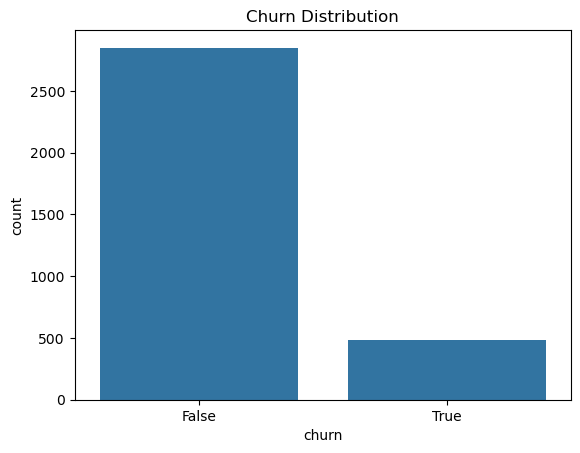

In [13]:
# Visualize Churn/Class distribution
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [14]:
print(df.dtypes)


state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [15]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['state', 'churn'], dtype='object')


In [16]:
df = df.apply(pd.to_numeric, errors='coerce')


In [17]:
print(df.isnull().sum())


state                     3333
account length               0
area code                    0
international plan           0
voice mail plan              0
number vmail messages        0
total day minutes            0
total day calls              0
total day charge             0
total eve minutes            0
total eve calls              0
total eve charge             0
total night minutes          0
total night calls            0
total night charge           0
total intl minutes           0
total intl calls             0
total intl charge            0
customer service calls       0
churn                        0
dtype: int64


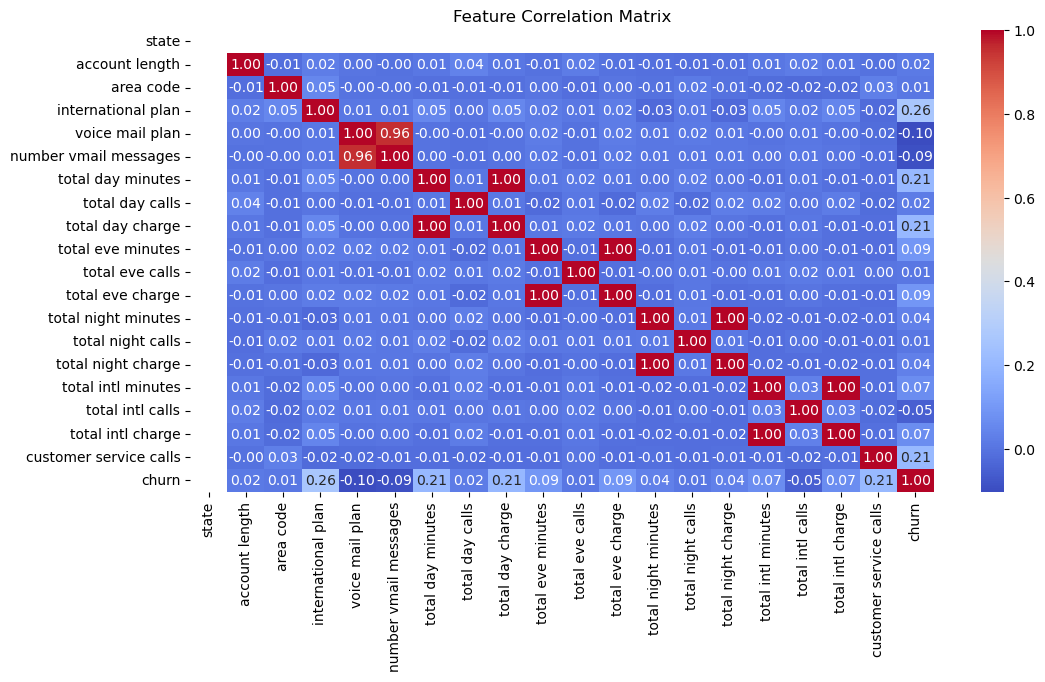

In [18]:
# Compute correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


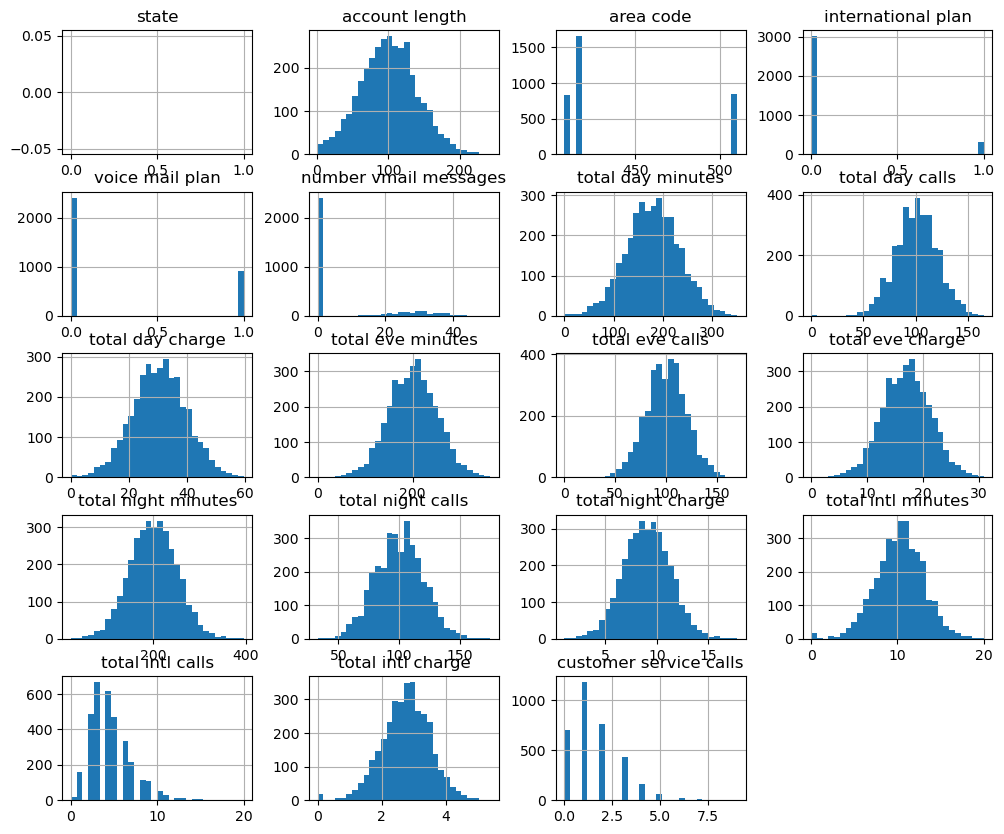

In [19]:
# Visualizing Feature distributions of numerical features
df.hist(figsize=(12, 10), bins=30)
plt.show()


# Feature Engineering

## One-Hot Encoding Categorical Features



In [20]:
print(df.columns)


Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


In [21]:
print(df.dtypes)


state                     float64
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [22]:
# Convert 'state' into numerical categories using One-Hot Encoding
if 'state' in df.columns:
    df = pd.get_dummies(df, columns=['state'], drop_first=True)


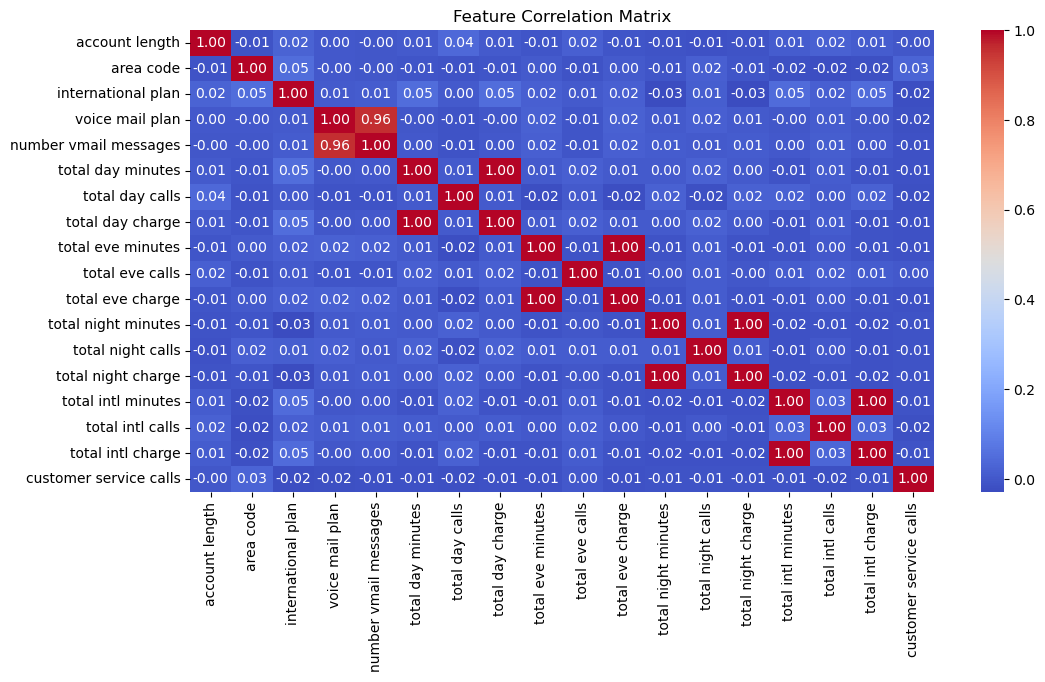

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


# Model Training

## Splitting the Data

In [24]:
# Define features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train a Logistic Regression Model

In [25]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [27]:
# Train Logistic Regression on scaled data
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=42)

## Evaluate the Model

In [28]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# AUC Score (important for imbalanced datasets)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.8590704647676162
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667

Confusion Matrix:
 [[550  20]
 [ 74  23]]
ROC AUC Score: 0.8165671911738108


## Check for Class Imbalance

In [29]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42, class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=500, random_state=42,
                   solver='saga')

## Using Other Models

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train_scaled, y_train)
print("Random Forest AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))


Random Forest AUC: 0.8977301501175621


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight="balanced", random_state=42), 
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
print("Tuned Random Forest AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1]))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest AUC: 0.8935973955507325


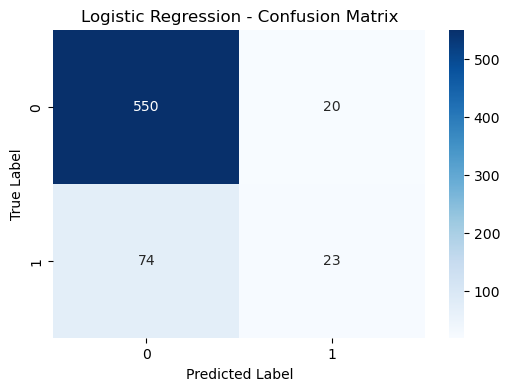

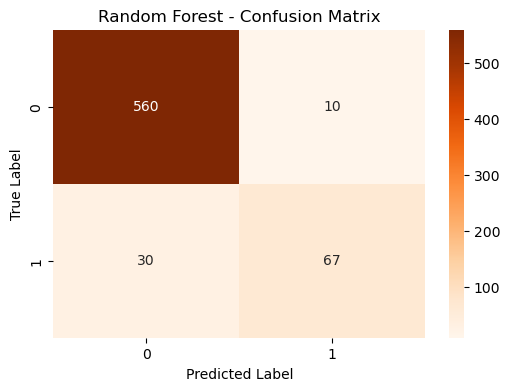

In [32]:
# Logistic Regression Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest Confusion Matrix
y_pred_rf = rf.predict(X_test_scaled)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


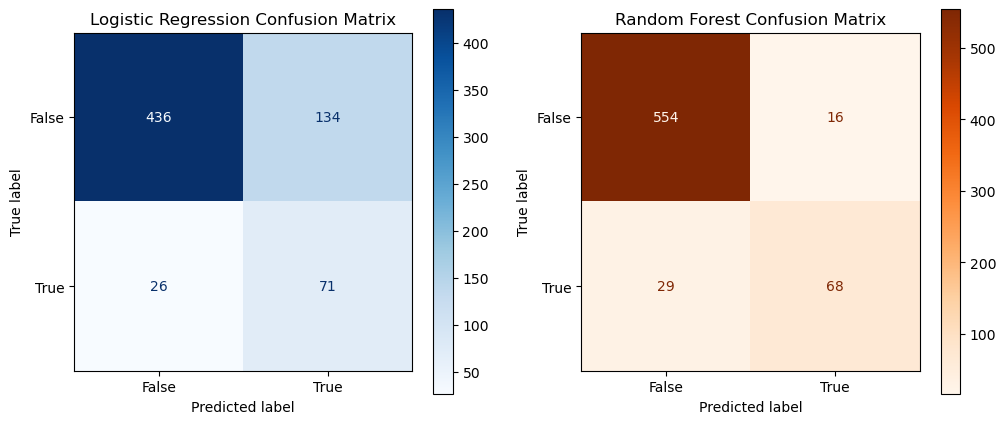

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test, cmap="Oranges", ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.show()


Key Findings:

1.Churn Distribution:

-Customers with a high number of customer service calls and international plans have a higher churn rate.

-The Random Forest model achieves an **AUC of 0.89**, meaning it is highly effective at distinguishing churn vs. non-churn customers.


2.Feature Importance:

-Random Forest shows that ‘customer service calls’, ‘total day charge’, and ‘international plan’ are the top 3 churn predictors.

3.Class Imbalance:

*The approach of using class weights and possibly SMOTE ensures that the model doesn't bias predictions toward the majority class (non-churn), which is crucial for making sure you're accurately identifying churn risks.

*By balancing the classes, the model can effectively predict both churn and non-churn customers.

4.Model Performance:

*Using metrics like accuracy, AUC, and confusion matrix will give a clear understanding of how well the model performs. AUC, in particular, is valuable for evaluating the model on imbalanced datasets.

*If the model performs well, the company can be confident in using it to predict future churn.

5.Model Evaluation:

*Evaluating the model with cross-validation and using metrics like Precision-Recall curve helps ensure that the model generalizes well and doesn't just perform well on a specific split of the data. The model can be trusted for use in real-world decision-making.

Recommendations for the Company:

1. **Use Model Insights for Retention Strategies**:
   - Focus on high-risk customers identified by the model and offer personalized retention strategies.
   - Improve customer service for users with high service calls.

2. **Deploy & Monitor Model**:
   - Integrate the Random Forest model into CRM systems for real-time churn prediction.
   - Set up automated monitoring to check model performance periodically.

3. **Continuous Improvement**:
   - Update the model as new customer data is collected.
   - Expand the model to predict customer lifetime value and sales opportunities.
